In [1]:
%matplotlib inline

In [2]:
from NLStats import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
# Data (simple linear example)
sold_data = np.array([141, 166, 161, 170, 148, 136, 169, 109, 117, 87, 105, 73, 82, 75])
cord_data = np.array([6.4, 6.1, 5.7, 6.9, 7.0 ,7.2, 6.6, 5.7, 5.7, 5.3, 4.9, 5.4, 4.5, 6.0])

In [4]:
# Set initial parameter estimates
param0 = {'const':0., 'slope':0, 'order':['const', 'slope']}

In [6]:
def residualsfunc(p, x, y):
    """Residual function to minimise"""
    return p[0] + p[1] * x - y

In [7]:
# Make new NLS class object
model1 = NLS(residualsfunc, param0, sold_data, cord_data, bounds=None, loss='linear')

In [8]:
# Run fitting routine
model1.fit()

In [9]:
# Print output of fit
model1.tout()


Non-linear least squares regression
Model: 'residualsfunc'
Trust Region Reflective Algorithm
Info: `gtol` termination condition is satisfied.
Parameters:
  Factor       Estimate       Std Error      t-value    P(>|t|)
  const        4.108182e+00   6.088062e-01   6.74793   0.00002
  slope        1.488500e-02   4.718547e-03   3.15457   0.00830

Residual Standard Error:  0.61617
                    AIC: 30.01366
                    BIC: 31.93083

Analysis of Variance:
  Source     DF   SS        MS         F-value   P(>F)
  Model       1   3.77830   3.77830    9.95166   0.00830
  Error      12   4.55598   0.37967
  Total      13   8.33429



In [11]:
# Setup plot data
x_test = np.linspace(60, 180, 60)
y_lsq = model1.parmEsts[0] + x_test * model1.parmEsts[1]

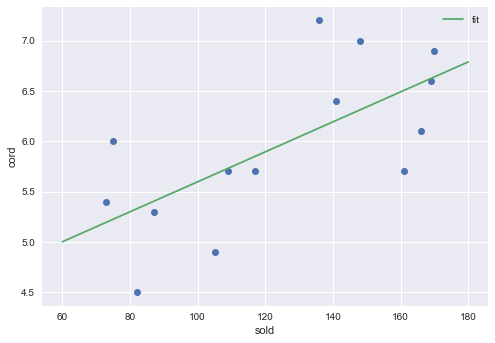

In [12]:
# Plot
plt.plot(sold_data, cord_data, 'o')
plt.plot(x_test, y_lsq, label='fit')
plt.xlabel("sold")
plt.ylabel("cord")
plt.legend()
plt.show()